6장 텍스트와 시퀀스를 위한 딥러닝
------

6장에서는 텍스트(단어의 시퀀스 또는 문자의 시퀀스), 시계열 또는 일반적인 시퀀스(sequence) 데이터를 처리할 수 있는 딥러닝 모델을 살펴볼 것이다.

시퀀스 데이터를 처리하는 기본적인 딥러닝 모델
- 순환 신경망(recurrent neural network)
- 1D 컨브넷(1D convnet)

어디에 사용할까?
- 문서 분류나 시계열 분류, 예를 들면 글의 주제나 책의 저자 식별하기
- 시계열 비교, 예를 들면 두 문서나 두 주식 가격이 얼마나 밀접하게 관련이 있는지 추정
- sequence to sequence, 예를 들면 영어 문장을 프랑스어로 변환하기
- 감성 분석, 긍정 부정 분류
- 시계열 예측, 예를 들어 어떤 지역의 치근 날씨 데이터가 주어졌을 때 향후 날씨 예측

### 6.1 텍스트 데이터 다루기

텍스트는 가장 흔한 sequence 형태의 데이터
- 단어의 sequence나 문자의 sequence로 이해할 수 있음
- 보통 단어 수준으로 작업하는 경우가 많음
- 기초적인 자연어 이해 문제를 해결할 수 있음
- 다양하게 사용

이런 모델은 문자 언어에 대한 통계적 구조를 만들어 간단한 텍스트 문제를 해결

다른 모든 신경망과 마찬가지로 텍스트 원본은 입력으로 사용 못 함
- 딥러닝은 수치형 텐서만 사용 가능하므로 텍스트를 수치형 텐서로 변환하는 과정을 텍스트 벡터화(vectorizing text)라고 함
  - 텍스트를 단어로 나누고 각 단어를 하나의 벡터로 변환
  - 텍스트를 문자로 나누고 각 문자를 하나의 벡터로 변환
  - 텍스트를 단어나 문자의 n-gram을 추출하여 각 n-그램을 하나의 벡터로 변환. n-그램은 연속된 단어나 문자의 그룹으로 텍스트에서 단어나 문자를 하나씩 이동하면서 추출
  
  
텍스트를 나누는 이런 단위(단어, 문자, n-그램)를 토큰(token)이라고 함
- 텍스트를 토큰으로 나누는 작업을 토큰화(tokenization)라고 함
- 모든 텍스트 벡터화 과정은 어떤 종류의 토큰화를 적용하고 생성된 토큰에 수치형 벡터를 연결하는 것으로 이루어짐
- 이런 벡터는 sequence 텐서로 묶여져서 심층 신경망에 넣어짐

토큰의 one-hot encoding 과 token embedding이 있다.

#### 6.1.1 단어와 문자의 원-핫 인코딩

one-hot encoding은 토큰을 벡터로 변환하는 가장 일반적이고 기본적인 방법
- 모든 단어에 고유한 정수 인덱스를 부여하고 이 정수 인덱스 i를 크기가 N(어휘 사전의 크기)인 이진 벡터로 변환
- 이 벡터는 i 번재 원소만 1이고 나머지는 모두 0이다.

In [57]:
import numpy as np

단어 수준의 원-핫 인코딩

In [2]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

token_index = {}

for sample in samples:
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index) + 1
            
max_length = 10

In [10]:
token_index

{'The': 1,
 'cat': 2,
 'sat': 3,
 'on': 4,
 'the': 5,
 'mat.': 6,
 'dog': 7,
 'ate': 8,
 'my': 9,
 'homework.': 10}

In [8]:
results = np.zeros(shape = (len(samples), max_length, max(token_index.values()) + 1))

In [9]:
results

array([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0

In [13]:
results.shape

(2, 10, 11)

In [11]:
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1.

In [12]:
results

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0

In [14]:
import string

samples = ['The cat sat on the mat.', 'The dog ate my homework.']
characters = string.printable  # 출력 가능한 모든 아스키(ASCII) 문자
token_index = dict(zip(characters, range(1, len(characters) + 1)))

max_length = 50
results = np.zeros((len(samples), max_length, max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    for j, character in enumerate(sample[:max_length]):
        index = token_index.get(character)
        results[i, j, index] = 1.

In [16]:
characters

'0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ \t\n\r\x0b\x0c'

In [15]:
results

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

케라스에는 원본 텍스트 데이터를 단어 또는 문자 수준의 원-핫 인코딩으로 변환해주는 유틸리티가 있습니다. 특수 문자를 제거하거나 빈도가 높은 N개의 단어만을 선택(입력 벡터 공간이 너무 커지지 않도록 하기 위한 일반적인 제한 방법입니다)하는 등 여러 가지 중요한 기능들이 있기 때문에 이 유틸리티를 사용하는 것이 좋습니다.

In [20]:
from keras.preprocessing.text import Tokenizer

In [22]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples) #단어 인덱스 구축

sequences = tokenizer.texts_to_sequences(samples) # 문자열을 정수 인덱스의 리스트로 변환

# 직접 원-핫 이진 벡터 표현을 얻을 수 있다. 원 - 핫 인코딩 외에 다른 벡터화 방법들도 제공
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 9 unique tokens.


In [24]:
tokenizer

In [23]:
sequences

[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]

In [25]:
one_hot_results

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [26]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.', 'I love you and the book is great']

In [27]:
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples) #단어 인덱스 구축

sequences = tokenizer.texts_to_sequences(samples) # 문자열을 정수 인덱스의 리스트로 변환

# 직접 원-핫 이진 벡터 표현을 얻을 수 있다. 원 - 핫 인코딩 외에 다른 벡터화 방법들도 제공
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 16 unique tokens.


In [28]:
sequences

[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9], [10, 11, 12, 13, 1, 14, 15, 16]]

In [31]:
# from pprint import pprint

In [34]:
print(len(one_hot_results[0]))
one_hot_results[0]

1000


array([0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

원-핫 인코딩의 변현 기법은 원-핫 해싱 기법
- 이 방식은 어휘 사전에 있는 고유한 토큰의 수가 너무 커서 모두 다루기 어려울 때 사용
- 각 단어에 명시적으로 인덱스를 할당하고 이 인덱스를 딕셔너리에 저장하는 대신에 단어를 해싱하여 고정된 크기의 벡터로 변환
- 일반적으로 간단한 해싱 함수 사용
- 이 방식의 주요 장점은 명시적인 단어 인덱스가 필요 없기 때문에 메모리를 절약하고 온라인 방식으로 데이터를 인코딩 할 수 있다.
  - 전체 데이터를 확인하지 않고 토큰 생성 가능
- 단점은 해시 충돌
  - 2개의 단어가 같은 해시를 만들면 이를 바라보는 머신 러닝 모델은 단어 사이의 차이를 인식하지 못 함
  - 해싱 공간의 차원이 해싱될 고유 토큰의 전체 개수보다 훨씬 크면 해시 충돌의 가능성은 감소

In [35]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# 단어를 크기가 1,000인 벡터로 저장합니다.
# 1,000개(또는 그이상)의 단어가 있다면 해싱 충돌이 늘어나고 인코딩의 정확도가 감소될 것입니다
dimensionality = 1000
max_length = 10

results = np.zeros((len(samples), max_length, dimensionality))

In [36]:
results

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [37]:
results.shape

(2, 10, 1000)

In [38]:
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        # 단어를 해싱하여 0과 1,000 사이의 랜덤한 정수 인덱스로 변환합니다.
        index = abs(hash(word)) % dimensionality
        results[i, j, index] = 1.

In [42]:
results[0][0][0:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

해시 - python : https://comdoc.tistory.com/entry/17-%ED%95%B4%EC%8B%B1hashing-%ED%8C%8C%EC%9D%B4%EC%8D%AC

#### 6.1.2 단어 임베딩 사용하기

단어와 벡터를 연관 짓는 강력하고 인기 있는 또 다른 방법!

단어 임베딩
- word vector 사용
- 원 - 핫 인코딩으로 만든 벡터는 희소(sparse - 대부분 0으로 채워짐), 고차원
- 반면에 단어 임베딩은 저차원의 실수형 벡터(희소 벡터의 반대말이 밀집 단어 벡터 임)

단어 임베딩은 데이터로부터 학습됨
- 보통 256차, 512차원 또는 큰 어휘 사전을 다룰 때는 1,024 차원의 단어 임베딩 사용
- 보통 단어 임베딩이 더 많은 정보를 적은 차원에 저장

단어 임베딩은 어떻게 만드나요?
- (문서 분류나 감성 예측) 관심 대상인 문제와 함께 단어 임베딩을 학습, 이런 경우에는 랜덤한 단어 벡터로 시작해서 신경망의 가중치를 학습하는 것과 같은 방식으로 단어 벡터 학습
- 풀려는 문제가 아니고 다른 머신 러닝 작업에서 미리 계산된 단어 임베딩을 로드함 - 이를 pretrained word embedding 이라고 함

### Embedding 층을 사용하여 단어 임베딩 학습하기

단어와 밀집 벡터를 연관 짓는 가장 간단한 방법은 랜덤하게 벡터를 선택하는 것
- 이 방식의 문제점은 임베딩 공간이 구조적이지 않다는 것
- 예를 들어 accurate와 exact 단어는 대부분 문장에서 비슷한 의미로 사용되지만 완전히 다른 임베딩을 가짐
- 심층 신경망이 이런 임의의 구조적이지 않은 임베딩 공간을 이해하기는 어렵다.

단어 벡터 사이에 좀 더 추상적이고 기하학적인 관계를 얻으려면 단어 사이에 있는 의미 관계를 반영
- 단어 임베딩은 언어를 기하하적 공간에 매핑하는 것
- 잘 구축된 임베딩 공간에서는 동의어가 비슷한 단어 벡터로 임베딩 될 것
- 일반적으로 두 단어 벡터 사이의 거리(L2 거리)는 이 단어 사이의 의미 거리와 관계되어 있다.
- 거리 외에 임베딩 공간의 특정 방향도 의미를 가질 수 있다.

예를 보자!! - 책 참조

사람의 언어를 완벽하게 매핑해서 어떤 자연어 처리 작업에도 사용할 수 있는 이상적인 단어 임베딩 공간이 있을까?
- 언젠가는 될려나...
- 사람의 언어도 마찬가지.
- 영화 리뷰와 법률 문서의 임베딩 공간도 다를 것이다.

새로운 작업에는 새로운 임베딩을!
- 역전파를 이용하면 쉽게 만들 수 있고 케라스를 이용하면 더 쉽다
- embedding층의 가중치를 학습


word2vec - https://www.youtube.com/watch?v=sY4YyacSsLc

In [43]:
from keras.layers import Embedding

# 임베딩 층은 적어도 2개의 매개변수를 받음 - 가능한 토큰의 개수(여기선 1000으로 단어 인덱스 최댓값 + 1)와 임베딩 차원(64)
embedding_layer = Embedding(1000, 64)

임베딩 층을 특정 단어를 나타내는 정수 인덱스를 밀집 벡터로 매핑하는 딕셔너리로 이해하는 것이 가장 좋음
- 정수를 입력으로 받아 내부 딕셔너리에서 이 정수에 연관된 벡터를 찾아 반환
- 딕셔너리 탐색은 효율적으로 수행됨

단어 인덱스 -> 임베딩 층 -> 연관된 단어 벡터

임베딩 층

- 입력
  - 크기가 (samples, sequece_length)인 2D 정수 텐서를 입력으로 받음
  - 각 샘플은 정수의 시퀀스
  - 가변 길이의 시퀀스를 임베딩 할 수 있다.
- 반환
  - 크기가 (samples, sequece_length, embedding_dimensionality)인 3D 실수행 텐서를 반환
  - 이런 3D 텐서는 RNN이나 1D 합성곱 층에서 처리됨

임베딩 층의 객체를 생성할 때 가중치(토큰 벡터를 위한 내부 딕셔너리)는 다른 층과 마찬가지로 랜덤하게 초기화 됨
- 훈련하면서 이 단어 벡터는 역전파를 통해 점차 조정되어 이어지는 모델이 사용할 수 있도록 임베딩 공간 구성
- 훈련이 끝나면 임베딩 공간은 특정 문제에 특화된 구조를 많이 가지게 됨


영화 리뷰
- 데이터 셋
- 가장 빈도가 높은 1만 개의 단어를 추출
- 리뷰에서 20개가 넘는 단어 버림
- 이 네트워크는 1만 개의 단어에 대해 8차원의 임베딩을 학습하여 정수 시퀀스 입력을 임베딩 시퀀스로 바꿀 것
- 그 다음 텐서를 2D로 펼쳐서 분류를 위한 Dense 층을 훈련
  

In [44]:
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000
maxlen = 20

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [45]:
# 리스트를 (samples, maxlen) 크기의 2D 정수 텐서로 변환

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

Embedding 층에 input_length를 지정하지 않으면 출력 텐서의 차원이 (None, None, 8)이 됨
- Flatten 층을 사용하려면 첫 번째 배치 차원을 제외하고 나머지 차원이 결정되어야 하므로 input_length를 지정하여 (None, 20, 8)로 만듬

In [48]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()
# 나중에 임베딩된 입력을 Flatten 층에서 펼치기 위해 Embedding 층에 input_length를 지정합니다.
model.add(Embedding(10000, 8, input_length=maxlen))
# Embedding 층의 출력 크기는 (samples, maxlen, 8)

# 3D 임베딩 텐서를 (samples, maxlen * 8) 크기의 2D 텐서로 펼칩니다.
model.add(Flatten())

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [49]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

/opt/conda/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 2s 78us/step - loss: 0.6682 - acc: 0.6240 - val_loss: 0.6169 - val_acc: 0.6948
Epoch 2/10
20000/20000 [==============================] - 1s 65us/step - loss: 0.5388 - acc: 0.7519 - val_loss: 0.5259 - val_acc: 0.7252
Epoch 3/10
20000/20000 [==============================] - 1s 61us/step - loss: 0.4608 - acc: 0.7868 - val_loss: 0.5020 - val_acc: 0.7398
Epoch 4/10
20000/20000 [==============================] - 1s 61us/step - loss: 0.4238 - acc: 0.8080 - val_loss: 0.4955 - val_acc: 0.7504
Epoch 5/10
20000/20000 [==============================] - 1s 61us/step - loss: 0.3982 - acc: 0.8223 - val_loss: 0.4967 - val_acc: 0.7586
Epoch 6/10
20000/20000 [==============================] - 1s 60us/step - loss: 0.3771 - acc: 0.8329 - val_loss: 0.4990 - val_acc: 0.7532
Epoch 7/10
20000/20000 [==============================] - 1s 61us/step - loss: 0.3582 - acc: 0.8472 - val_loss: 0.5070 - val_acc:

결과 해석
- 약 75%의 acc
- 리뷰에서20개의 단어만 사용한 것치고 무난
- 하지만 임베딩 시퀀스를 펼치고 하나의 Dense 층을 훈련 했으므로 입력 시퀀스에 있는 각 단어를 독립적으로 다룸
- 단어 사이의 관계나 문장 구조를 고려하지 않음
- 각 시퀀스 전체를 고려한 특성을 학습하도록 임베딩 층 위에 순환 층이나 1D convD 층을 추가흔ㄴ 것이 좋음

곧 살펴볼거임

### 사전 훈련된 단어 임베딩 사용
- 미리 만들어진 것을 사용하자
- 자연어 처리에서 사전 훈련된 단어 임베딩을 사용하는 이유는 이미지 분류 문제에서 사전 훈련된 컨브넷을 사용하는 이유와 거의 동일
- 꽤 일반적인 특성이 필요...

복붙함

> 단어 임베딩은 일반적으로 (문장이나 문서에 같이 등장하는 단어를 관찰하는) 단어 출현 통계를 사용하여 계산됩니다. 여기에는 여러 가지 기법이 사용되는데 신경망을 사용하는 것도 있고 그렇지 않은 방법도 있습니다. 단어를 위해 밀집된 저차원 임베딩 공간을 비지도 학습 방법으로 계산하는 아이디어는 요슈아 벤지오 등이 2000년대 초에 조사했습니다. 연구나 산업 애플리케이션에 적용되기 시작된 것은 Word2vec 알고리즘이 등장한 이후입니다. 이 알고리즘은 2013년 구글의 토마스 미코로프가 개발하였으며 가장 유명하고 성공적인 단어 임베딩 방법입니다. Word2vec의 차원은 성별 같은 구체적인 의미가 있는 속성을 잡아냅니다.

> 케라스의 Embedding 층을 위해 내려받을 수 있는 미리 계산된 단어 임베딩 데이터베이스가 여럿 있습니다. Word2vec은 그 중 하나입니다. 인기 있는 또 다른 하나는 2014년 스탠포드 대학의 연구자들이 개발한 GloVe(Global Vectors for Word Representation)입니다. 이 임베딩 기법은 단어의 동시 출현 통계를 기록한 행렬을 분해하는 기법을 사용합니다. 이 개발자들은 위키피디아 데이터와 커먼 크롤 데이터에서 가져온 수백만 개의 영어 토큰에 대해서 임베딩을 미리 계산해 놓았습니다.

> GloVe 임베딩을 케라스 모델에 어떻게 사용하는지 알아보죠. Word2vec 임베딩이나 다른 단어 임베딩 데이터베이스도 방법은 같습니다. 앞서 보았던 텍스트 토큰화 기법도 다시 살펴보겠습니다. 원본 텍스트에서 시작해서 완전한 모델을 구성해 보겠습니다.




#### 6.1.3 모든 내용을 적용하기 : 원본 텍스트에서 단어 임베딩까지

- 문장들을 벡터의 시퀀스로 임베딩하고 펼친 후 그 위에 Dense 층을 훈련
- 여기서는 사전 훈련된 단어 임베딩 사용
- 케라스에 포함된 IMDB 데이터는 미리 토큰화가 되어 있음(!!!)
- 이를 사용하슨 ㄴ대신 원본 텍스트 데이터를 내려 받아 처음부터 시작!

In [140]:
import os

imdb_dir = 'aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            with open(os.path.join(dir_name, fname), encoding='utf8') as file:
                texts.append(file.read())
        
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

texts 출력 금지...--;;

In [ ]:
### 

In [141]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

In [147]:
maxlen = 100  # 100개 단어 이후는 버립니다
training_samples = 200  # 훈련 샘플은 200개입니다
validation_samples = 10000  # 검증 샘플은 10,000개입니다
max_words = 10000  # 데이터셋에서 가장 빈도 높은 10,000개의 단어만 사용합니다

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('%s개의 고유한 토큰을 찾았습니다.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

88582개의 고유한 토큰을 찾았습니다.


In [148]:
lables = np.asarray(labels)
print('데이터 텐서의 크기:', data.shape)
print('레이블 텐서의 크기:', labels.shape)

데이터 텐서의 크기: (25000, 100)
레이블 텐서의 크기: (25000,)


In [149]:
# 데이터를 훈련 세트와 검증 세트로 분할합니다.
# 샘플이 순서대로 있기 때문에 (부정 샘플이 모두 나온 후에 긍정 샘플이 옵니다) 
# 먼저 데이터를 섞습니다.

indices = np.arange(data.shape[0])

In [150]:
indices

array([    0,     1,     2, ..., 24997, 24998, 24999])

In [151]:
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [152]:
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = lables[training_samples: training_samples + validation_samples]

#### 임베딩 전처리

단어와 이에 상응하는 벡터 표현(즉, 숫자 벡터)를 매핑하는 인덱스를 만듬

In [76]:
glove_dir = './datasets/'

embeddings_index = {}

# .100d, .200d 숫자는 차원을 의미함
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('%s개의 단어 벡터를 찾았습니다.' % len(embeddings_index))

400000개의 단어 벡터를 찾았습니다.


그다음 Embedding 층에 주입할 수 있도록 임베딩 행렬을 만듭니다. 이 행렬의 크기는 (max_words, embedding_dim)이어야 합니다. 이 행렬의 i번째 원소는 (토큰화로 만든) 단어 인덱스의 i번째 단어에 상응하는 embedding_dim 차원 벡터입니다. 인덱스 0은 어떤 단어나 토큰도 아닐 경우를 나타냅니다.

In [77]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    
    if i < max_words:
        if embedding_vector is not None:
            # 임베딩 인덱스에 없는 단어는 모두 0이 됩니다.
            embedding_matrix[i] = embedding_vector

In [153]:
embedding_matrix.shape

(10000, 100)

In [154]:
embedding_matrix[300]

array([ 0.027587  , -0.47499999, -0.22745   ,  0.033388  ,  0.24517   ,
        0.15746   ,  0.47597   ,  0.22717001,  0.064186  , -0.024291  ,
        0.44207001,  0.090494  ,  0.24425   ,  0.33906999,  0.38284999,
       -0.53759998,  0.46814999, -0.063625  , -0.70665997, -0.21427999,
        0.234     , -0.50603998,  0.17174   ,  0.43377   ,  0.22311001,
       -0.23438001, -0.21264   , -0.39855999,  0.55372   ,  0.46415001,
       -0.14084999,  0.59065002, -0.69252002,  0.26242   , -0.23958001,
        0.35126999, -0.19809   , -0.072761  , -0.29886001, -0.28567001,
       -0.91970998, -0.35141   ,  0.20029999, -0.060185  ,  0.1837    ,
       -0.017188  ,  0.057039  , -0.46265   ,  0.79540002, -0.41626999,
       -0.067855  , -0.057482  ,  0.61104   ,  1.03240001, -0.19426   ,
       -2.5940001 , -0.95113999, -0.28406   ,  1.00610006,  1.08089995,
       -0.11912   ,  1.06400001, -0.24482   ,  0.43649   ,  0.77034003,
       -0.59828001,  0.014552  ,  0.48963001,  0.0028154 ,  0.36

#### 모델 정의하기

In [78]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten

In [155]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_5 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


#### 모델에 Glove 임베딩 로드하기

임베딩 층은 하나의 가중치 행렬을 가짐
- 이 행렬은 2D 부동 소수 행렬이고 각 i 번째 원소는 i 번째 인덱스에 상응하는 단어 벡터
- 모델의 첫 번째 층은 임베딩 층에 준비된 Glove 행렬을 로드!!!

In [156]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

추가적으로 Embedding 층을 동결합니다(trainable 속성을 False로 설정합니다). 사전 훈련된 컨브넷 특성을 사용할 때와 같은 이유입니다. 모델의 일부는 (Embedding 층처럼) 사전 훈련되고 다른 부분은 (최상단 분류기처럼) 랜덤하게 초기화되었다면 훈련하는 동안 사전 훈련된 부분이 업데이트되면 안됩니다. 이미 알고 있던 정보를 모두 잃게 됩니다. 랜덤하게 초기화된 층에서 대량의 그래디언트 업데이트가 발생하면 이미 학습된 특성을 오염시키기 때문입니다.

#### 모델 훈련과 평가

In [157]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 3ms/step - loss: 3.3560 - acc: 0.4900 - val_loss: 1.8117 - val_acc: 0.0022
Epoch 2/10
200/200 [==============================] - 1s 3ms/step - loss: 0.6222 - acc: 0.6800 - val_loss: 0.3760 - val_acc: 0.8828
Epoch 3/10
200/200 [==============================] - 1s 3ms/step - loss: 0.5419 - acc: 0.7950 - val_loss: 0.1586 - val_acc: 0.9917
Epoch 4/10
200/200 [==============================] - 1s 3ms/step - loss: 0.2797 - acc: 0.8650 - val_loss: 0.4483 - val_acc: 0.8039
Epoch 5/10
200/200 [==============================] - 1s 3ms/step - loss: 0.1022 - acc: 0.9850 - val_loss: 1.0076 - val_acc: 0.4101
Epoch 6/10
200/200 [==============================] - 0s 2ms/step - loss: 0.7673 - acc: 0.8050 - val_loss: 1.1349 - val_acc: 0.2966
Epoch 7/10
200/200 [==============================] - 1s 3ms/step - loss: 0.0624 - acc: 1.0000 - val_loss: 2.6507 - val_acc: 0.0199
Epoch 8/10
200/200 [========

In [158]:
import matplotlib.pyplot as plt

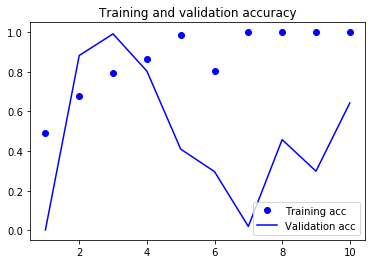

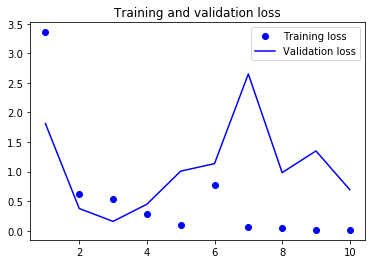

In [159]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

훈련 샘플 수가 적기 때문에 성능이 들쭉 날쭉 한 것으로 보임

사전 훈련된 단어 임베딩을 사용하지 않거나 임베딩 층을 동결하지 않고도 사용할 수 있음
- 이런 경우 해당 작업에 특화된 입력 토큰의 임베딩을 학습할 것
- 데이터가 풍부하게 있다면 결과 좋을거임
- 200개이지만 한 번 해봅시다.

In [94]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_3 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


/opt/conda/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 4ms/step - loss: 0.6854 - acc: 0.5350 - val_loss: 0.7651 - val_acc: 0.0879
Epoch 2/10
200/200 [==============================] - 1s 3ms/step - loss: 0.4949 - acc: 0.9700 - val_loss: 0.8310 - val_acc: 0.1693
Epoch 3/10
200/200 [==============================] - 1s 3ms/step - loss: 0.2768 - acc: 0.9900 - val_loss: 0.8118 - val_acc: 0.3809
Epoch 4/10
200/200 [==============================] - 1s 3ms/step - loss: 0.1227 - acc: 1.0000 - val_loss: 0.9636 - val_acc: 0.2088
Epoch 5/10
200/200 [==============================] - 1s 3ms/step - loss: 0.0595 - acc: 1.0000 - val_loss: 0.8979 - val_acc: 0.3029
Epoch 6/10
200/200 [==============================] - 1s 3ms/step - loss: 0.0300 - acc: 1.0000 - val_loss: 1.1071 - val_acc: 0.1612
Epoch 7/10
200/200 [==============================] - 1s 3ms/step - loss: 0.0164 - acc: 1.0000 - val_loss: 1.0227 - val_acc: 0.2539
Epoch 8/10
200/200 [========

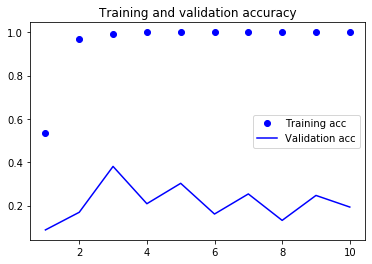

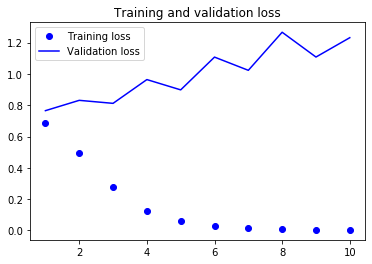

In [95]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

아..망했어요
- 사전 훈련된 걸 씁시다. ㅠ.ㅠ

마지막으로 테스트 데이터에서 모델을 평가
- 우선 테스트 데이터를 토큰화

In [96]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding="utf8")
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [98]:
x_test[0]

array([ 300,   31,   60,   55,   10,  119,   21,  456,    1,  106,   72,
        141,   63,  456,   41,    6,    3,   52, 9381,    1,  436,    6,
         26,  263,  122,   14,  550,   34, 1287,  237,  125,   71,  256,
        331,  184,   87,    2,  284,   54, 4103,    4,    3, 4227,   24,
         61,  735,    5,   27, 1570,  117,  414,   51,   72,   23,   70,
        498,    1,  317,   93,  210,    4,   11, 4214,  713,  175,   29,
         41, 2738,   72,   23,  576,  135,    6, 2170,    5,   27,    1,
        115,   16,   54, 2601,   39,   54, 1234,  130,    9,   13,   29,
         10,   97,   78,    5,  398,   36, 1584,    9,  122,   32,  531,
          8], dtype=int32)

In [99]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 1s 51us/step


[3.0529638805135337, 0.5008800029754639]

-------------

2000개 정도의샘플로 테스트를 해보자

In [134]:
import os

imdb_dir = 'aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            with open(os.path.join(dir_name, fname), encoding='utf8') as file:
                texts.append(file.read())
        
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [135]:
maxlen = 100  # 100개 단어 이후는 버립니다
training_samples = 2000  # 훈련 샘플은 200개입니다
validation_samples = 10000  # 검증 샘플은 10,000개입니다
max_words = 10000  # 데이터셋에서 가장 빈도 높은 10,000개의 단어만 사용합니다

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('%s개의 고유한 토큰을 찾았습니다.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('데이터 텐서의 크기:', data.shape)
print('레이블 텐서의 크기:', labels.shape)

# 데이터를 훈련 세트와 검증 세트로 분할합니다.
# 샘플이 순서대로 있기 때문에 (부정 샘플이 모두 나온 후에 긍정 샘플이 옵니다) 
# 먼저 데이터를 섞습니다.
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

88582개의 고유한 토큰을 찾았습니다.
데이터 텐서의 크기: (25000, 100)
레이블 텐서의 크기: (25000,)


In [136]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_4 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [137]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [138]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model_2000_samples.h5')

Train on 2000 samples, validate on 10000 samples
Epoch 1/10
2000/2000 [==============================] - 1s 428us/step - loss: 0.7635 - acc: 0.5465 - val_loss: 0.6864 - val_acc: 0.5250
Epoch 2/10
2000/2000 [==============================] - 1s 387us/step - loss: 0.6597 - acc: 0.6230 - val_loss: 0.6536 - val_acc: 0.6352
Epoch 3/10
2000/2000 [==============================] - 1s 384us/step - loss: 0.5740 - acc: 0.7220 - val_loss: 0.6503 - val_acc: 0.6335
Epoch 4/10
2000/2000 [==============================] - 1s 389us/step - loss: 0.4667 - acc: 0.7910 - val_loss: 0.6882 - val_acc: 0.6022
Epoch 5/10
2000/2000 [==============================] - 1s 402us/step - loss: 0.3691 - acc: 0.8425 - val_loss: 0.6558 - val_acc: 0.6496
Epoch 6/10
2000/2000 [==============================] - 1s 420us/step - loss: 0.2864 - acc: 0.8790 - val_loss: 0.6924 - val_acc: 0.6498
Epoch 7/10
2000/2000 [==============================] - 1s 399us/step - loss: 0.2203 - acc: 0.9205 - val_loss: 0.9126 - val_acc: 0.6026

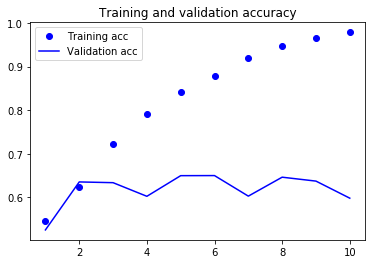

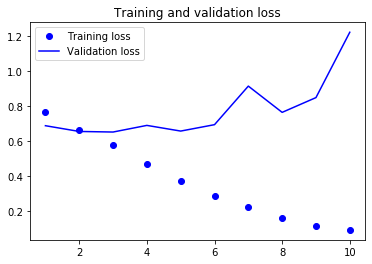

In [139]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

2000개로 하니까 조금 더 나아진 듯?

### 6.2 순환 신경망 이해하기

기존의 신경망 모델은 메모리가 없다는 점
- 네트워크에 주입되는 입력은 개별적으로 처리되며 입력 간에 유지되는 상태가 없다.
- 이런 네트워크로 시퀀스나 시계열 데이터를 처리하려면 네트워크에 전체 시퀀스를 넣어야 함
- 즉, 전체 시퀀스를 하나의 데이터 포인트로 변환해야 함
- 예를 들면 IMDB 문제에서 영화 리뷰 하나를 큰 벡터 하나로 변환하여 처리 - > 이런 네트워크를 feedforward network라고 함

반대로 사람이 문장을 읽는 것처럼 이전에 나온 것을 기억하면서 단어별로 또는 한눈에 들어오는 만큼씩 처리할 수 있다.
- 이는 문장에 있는 의미를 자연스럽게 표현하도록 도와줌
- 생물학적 지능은 정보 처리를 위한 내부 모델을 유지하면서 점진적으로 정보 처리
- 이 모델은 과거 정보를 사용하여 구축되며 새롭게 얻은 정보를 계속 업데이트

극단적으로 단순화시킨 버전이지면 순환 신경망 - RNN(Recurrent Neural Network)은 같은 원리를 적용
- 시퀀스의 원소를 순회하면서 지금까지 처리한 정보를 상태(state)에 저장합니다.
- 사실 RNN은 내부에 루프(loop)를 가진 신경망의 한 종류
- RNN의 상태는 2개의 다른 시퀀스를 처리하는 사이에 재설정됨
- 하나의 시퀀스가 여전히 하나의 데이터 포인트로 간주됨
- 즉, 네트워크에 하나의 입력을 넣는다고 가정, 이 데이터 포인트가 한 번에 처리되지 않는다는 것이 다름
- 그 대신 네트워크는 시퀀스의 원소를 차례대로 방문

루프와 상태에 대한 개념 이해
- 넘파이로 RNN 정방향 구현
- 이 예제는 RNN의 크기가 (timesteps, input_features)인 2D 텐서로 인코딩된 벡터의 시퀀스를 입력 받음
- 이 시퀀스는 타임스텝을 따라서 반복됨
- 각 타임 스템 t에서 현재 상태와 ((input_features,) 크기의) 입력을 연결하려 출력을 계산
- 그다음 이 출력을 다음 스텝의 상태로 설정
- 첫 번째 타임스텝에서는 이전 출력이 정의되지 않으므로 현재 상태가 없음. 이 때는 네트워크의 초기 상태인 0 벡터로 상태를 초기화

pseudocode!!를 보자

```python
state_t = 0

for input_t in input_sequence: # 시퀀스의 원소를 반복
    output_t = f(input_t, state_t)
    state_t = output_t # 출력은 다음 반복을 위한 상태가 됨
```

f함수는 입력과 상태를 출력으로 변환
- 이를 2개의 행렬 W와 U 그리고 편향 벡터를 사용하는 변환으로 바꿀 수 있다.

```python
state_t = 0

for input_t in input_sequence:
    output_t = activation(dot(W, input_t) + dot(U, state_t) + b)
    state_t = output_t
```

In [160]:
import numpy as np

timesteps = 100 # 입력 시퀀스에 있는 타임스텝의 수
input_features = 32 # 입력 특성의 차원
output_features = 64 # 출력 특성의 차원

inputs = np.random.random((timesteps, input_features))

state_t = np.zeros((output_features,))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []

for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b) # 입력과 현재 상태(이전 출력)을 연결하여 현재 출력을 얻음
    
    successive_outputs.append(output_t) # 이 출력을 리스트에 저장
    state_t = output_t # 다음 타임스텝을 위해 네트워크의 상태를 업데이트
    

final_output_sequence = np.stack(successive_outputs, axis=0)

In [161]:
final_output_sequence

array([[0.9999998 , 0.99999996, 0.99999998, ..., 0.99999034, 0.99999996,
        0.99999971],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]])

요약하면 RNN은 반복할 때 이전에 계산한 정보를 재사용하는 for 루프에 지나지 않는다.
- 물론 이 정의에 맞는 RNN의 종류는 많다.
- 이 예는 아주 간단한 RNN의 형태
- RNN은 스텝(step) 함수에 의해 특화됨. 이 예에서는....

```python
output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
```

### 6.2.1 케라스의 순환 층

Numpy로 간단하게 구현한 과정이 실제 케라스의 simpleRNN 층에 해당

```python
from keras.layers import SimpleRNN
```

한 가지 다른 점은 넘파이 예제처럼 하나의 시퀀스가 아니라 다른 케라스 층과 마찬가지로 시퀀스 배치로 처리한다는 것
- 즉, (timesteps, input_features)가 아니라 (batch_size, timesteps, input_features) 크기의 입력을 받음

케라스에 있는 모든 순환 층과 마찬가지로 SimpleRNN은 두 가지 모드로 실행할 수 있다.
- 각 타임스텝의 출력을 모은 전체 시퀀스를 반환하거나 -> 크기가 (batch_size, timesteps, output_features)인 3D 텐서)
- 입력 시퀀스에 대한 마지막 출련만 반환할 수 있다. -> 크기가 (batch_size, output_features)인 2D 텐서)

이 모드를 객체로 생성할 때 return_sequences 매개변수로 선택할 수 있다.

In [163]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

In [164]:
# 마지막 타임스텝의 출력만 얻는 예제

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [165]:
# 전체 상태 시퀀스 반환

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


층을 여러개 놓기도 함 - > 이런 설정에서는 중간층들이 전체 출력 시퀀스를 반환하도록 설정

In [166]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))  # 맨 위 층만 마지막 출력을 반환합니다.
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [167]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000 # 특성으로 사용할 단어 수
maxlen= 500 # 사용할 텍스트의 길이(가장 빈번한 max_features개의 단어만 사용)
batch_size = 32

In [168]:
print('데이터 로딩...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

print(len(input_train), '훈련 시퀀스')
print(len(input_test), '테스트 시퀀스')

데이터 로딩...
25000 훈련 시퀀스
25000 테스트 시퀀스


In [169]:
input_train[0]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]

In [173]:
print('시퀀스 패딩 (samples x time)')

input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

print('input_train 크기:', input_train.shape)
print('input_test 크기:', input_test.shape)

시퀀스 패딩 (samples x time)
input_train 크기: (25000, 500)
input_test 크기: (25000, 500)


In [175]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

/opt/conda/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 19s 926us/step - loss: 0.6526 - acc: 0.6051 - val_loss: 0.5194 - val_acc: 0.7568
Epoch 2/10
20000/20000 [==============================] - 15s 748us/step - loss: 0.4206 - acc: 0.8243 - val_loss: 0.3746 - val_acc: 0.8468
Epoch 3/10
20000/20000 [==============================] - 14s 724us/step - loss: 0.3080 - acc: 0.8792 - val_loss: 0.4795 - val_acc: 0.8052
Epoch 4/10
20000/20000 [==============================] - 14s 714us/step - loss: 0.2329 - acc: 0.9132 - val_loss: 0.4554 - val_acc: 0.8424
Epoch 5/10
20000/20000 [==============================] - 14s 703us/step - loss: 0.1673 - acc: 0.9387 - val_loss: 0.4331 - val_acc: 0.8180
Epoch 6/10
20000/20000 [==============================] - 14s 709us/step - loss: 0.1184 - acc: 0.9589 - val_loss: 0.5310 - val_acc: 0.7798
Epoch 7/10
20000/20000 [==============================] - 14s 691us/step - loss: 0.0763 - acc: 0.9759 - val_loss: 0.4

In [176]:
import matplotlib.pyplot as plt

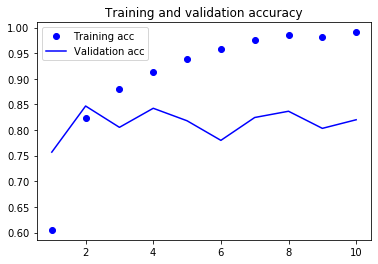

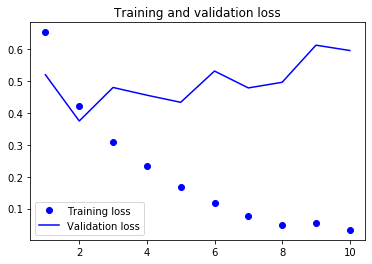

In [177]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()